### Lab: Piecewise Linear Regression via Feature Transformations

In this lab, we fit a piecewise linear model to a dataset using a specified breakpoint (λ) to divide the data into two regions, with the constraint that the two models must meet at x = λ. The goal is to transform the data into a suitable form for multiple linear regression, allowing us to model the two linear segments while ensuring continuity at the breakpoint. We extract the optimal parameters (`a1`, `s1`, and `s2`) from the model using the least squares method and visualize the fitted piecewise function against the dataset. The lab demonstrates data transformation techniques, model fitting, and parameter extraction in the context of a piecewise linear regression problem.


Import Libraries and load the dataset. We are using the Auto MPG dataset, which contains information about cars, including their miles per gallon (mpg) ratings and other attributes. We will use the `mpg` and `horsepower` columns for this lab.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
names = ['mpg', 'cylinders','displacement', 'horsepower',
         'weight', 'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                 header=None,delim_whitespace=True,names=names,na_values='?')

df = df[['mpg','horsepower']]
df = df.dropna()

/var/folders/8_/5mb0x5m14ps2x2nwgcf7gfnr0000gn/T/ipykernel_21373/716049011.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',


The piecewise linear model is defined as follows. Our approach will implement the Unconstrained model:
#### Constrained Model

f(x_i) = 
{ a_1 + s_1 * x_i  for x_i < λ  
{ a_2 + s_2 * x_i  for x_i ≥ λ

with the constraint:

a_1 + s_1 * λ = a_2 + s_2 * λ

#### Unconstrained Model

f(x_i) = 
{ a_1 + s_1 * x_i                     for x_i < λ  
{ a_1 + s_1 * λ - s_2 * λ + s_2 * x_i for x_i ≥ λ




In [7]:
#transform X matrix
X1D = df['horsepower'].values
y = df['mpg'].values

l = 100  # Lambda value

indicator = np.where(X1D >= l, 1, 0)

X = np.column_stack((
    np.ones_like(X1D),         # intercept col of ones
    X1D,                       # xi for all data points
    indicator * (X1D - l)      # Adjustment term
))

In [8]:
# Fit the model
Xt = np.transpose(X)

beta = np.linalg.inv(Xt @ X) @ Xt @ y

a1 = beta[0]
s1 = beta[1]
s2 = beta[1] + beta[2]

def piecewiseLinReg(x):
    return np.where(
        x < l,
        a1 + s1 * x,
        a1 + s1 * l - s2 * l + s2 * x
    )

# get consistent x values for plotting linear fit lines
xPlot = np.linspace(np.min(X1D), np.max(X1D), 500)

# predict y values
yhat = piecewiseLinReg(xPlot)

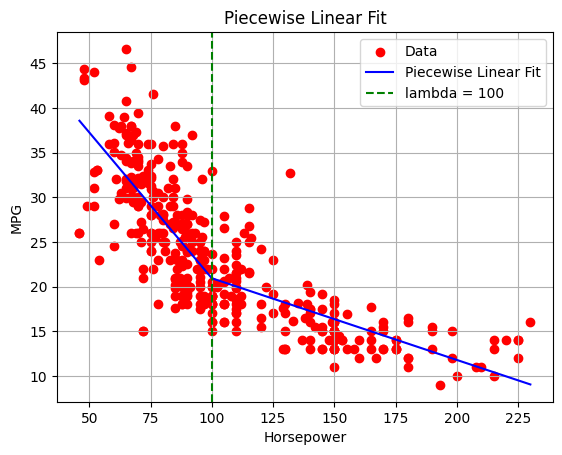

In [9]:
#Plot the data and the piecewise linear fit
plt.scatter(X1D, y, color='red', label='Data')
plt.plot(xPlot, yhat, color='blue', label='Piecewise Linear Fit')
plt.axvline(x=l, color='green', linestyle='--', label=f'lambda = {l}')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Piecewise Linear Fit')
plt.legend()
plt.grid(True)
plt.show()